In [1]:
#pytorch custom datasets
import torch
from torch import nn
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

print(torch.__version__)

2.0.1+cpu


In [2]:
#Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
# Get Data
# dataset is a subset of Fodd101
# consists of 3 classes
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If image folder does not exist, download
if image_path.is_dir():
    print(f"{image_path} directory already exists...skipping download")
else:
    print(f"{image_path} does not exist, creating one..")
    image_path.mkdir(parents=True,exist_ok=True)

# Download data
with open(data_path / 'pizza_steak_sushi.zip', "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print(f"Downloading data....")
    f.write(request.content)

# Unzip files
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping data...")
    zip_ref.extractall(image_path)

data\pizza_steak_sushi directory already exists...skipping download
Unzipping data...


In [4]:
# Data preparation and data exploration
import os
def walk_through_dir(dir_path):
    """
    Walks through dir path returning its contents.
    """
    for dirpath,dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'. ")

In [5]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi'. 
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'. 
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'. 
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'. 
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'. 
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'. 
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'. 
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'. 
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'. 


In [6]:
image_path

WindowsPath('data/pizza_steak_sushi')

In [7]:
# Setup train and test path
train_dir = image_path / 'train'
test_dir = image_path / 'test'
train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

Random image path : data\pizza_steak_sushi\train\steak\2287136.jpg
Image class: steak
Image height: 512
Image width: 512


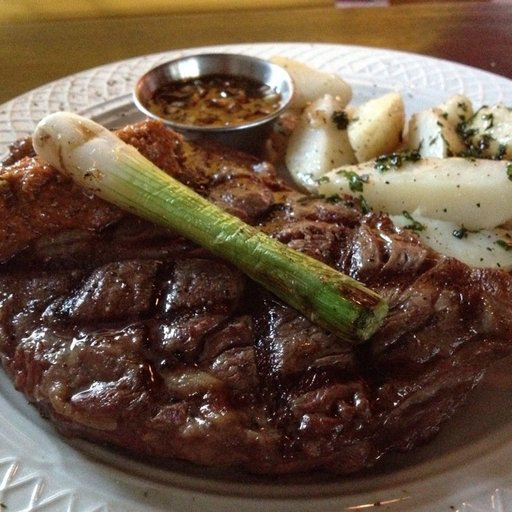

In [8]:
# Visualising the image
import random
from PIL import Image

# random.seed(42)

# Get all image path
image_path_list = list(image_path.glob("*/*/*.jpg"))

# image_path_list[:10]
# pick a random image path
random_image_path = random.choice(image_path_list)
# print(random_image_path)

# get image class from path name
image_class = random_image_path.parent.stem
# print(image_class)

# Open image
img = Image.open(random_image_path)

# print metadata
print(f"Random image path : {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

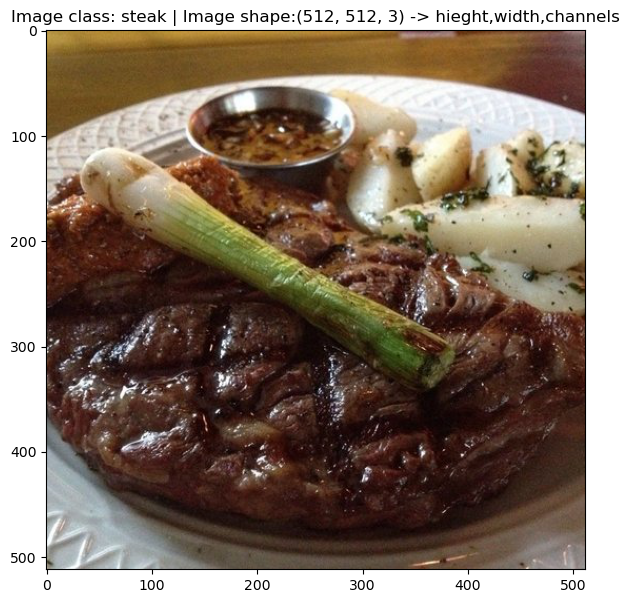

In [9]:
# Plot images using matplotlib
import matplotlib.pyplot as plt
import numpy as np

img_as_array = np.asarray(img)

# plot image
plt.figure(figsize = (12,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape:{img_as_array.shape} -> hieght,width,channels");

In [10]:
# Transforming data into tensors
# Truning target data into tensors
# Turn it into torch.utils.data.Dataset -> further into torch.utils.data.Dataloader

import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# transforming data with torchvision.transforms

data_transform = transforms.Compose([
        # Resize images to 64x64
        transforms.Resize(size=(64,64)),
    
        # flip images randomly on horizontly
        transforms.RandomHorizontalFlip(p=0.5),
    
        # turn  pil image to tensor
        transforms.ToTensor()
])

In [11]:
data_transform(img).dtype

torch.float32

In [12]:
random_image_path

WindowsPath('data/pizza_steak_sushi/train/steak/2287136.jpg')

In [13]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [14]:
img_as_array.shape

(512, 512, 3)

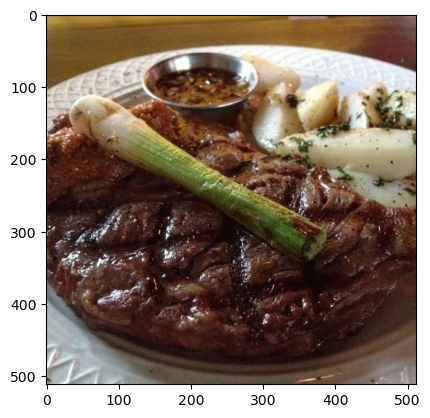

In [15]:
plt.imshow(img_as_array)

In [16]:
image_path

WindowsPath('data/pizza_steak_sushi')

In [17]:
len(image_path_list)

300

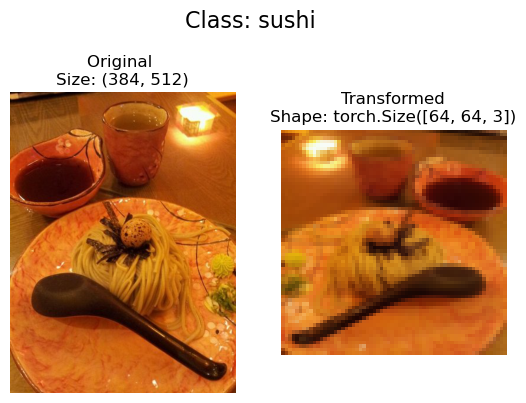

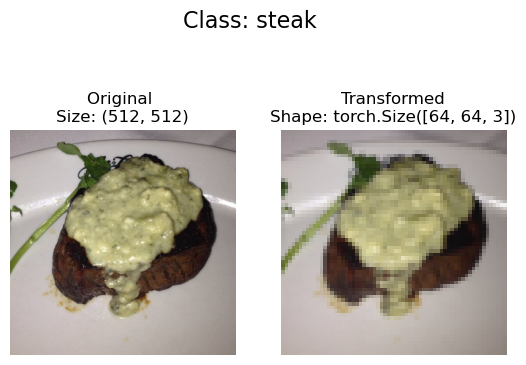

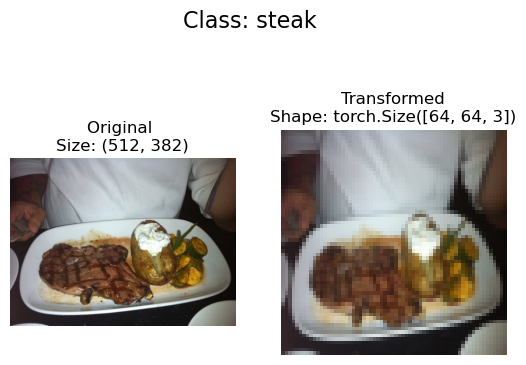

In [18]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
    """
    Selects random images from a path of images and loads/transforms them
     ,then plots the original vs transformed version
    """
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows = 1, ncols = 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis(False)
            
            # transform and plot target image
            transformed_image = transform(f).permute(1,2,0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
            ax[1].axis(False)
            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)
            
plot_transformed_images(image_paths=image_path_list,
                       transform=data_transform,
                       n=3
                       )
    

In [19]:
# Loading image data using ImageFolder
# We can load image classification using torchvision.datasets.ImageFolder

from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                 transform=data_transform, # transform the data
                                 target_transform=None) #transform the label

test_data = datasets.ImageFolder(root=test_dir,
                                transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [20]:
# Get class names as list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [21]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [22]:
# check len of datasets
len(train_data), len(test_data)

(225, 75)

In [23]:
train_data.samples[:5]

[('data\\pizza_steak_sushi\\train\\pizza\\1008844.jpg', 0),
 ('data\\pizza_steak_sushi\\train\\pizza\\1033251.jpg', 0),
 ('data\\pizza_steak_sushi\\train\\pizza\\1044789.jpg', 0),
 ('data\\pizza_steak_sushi\\train\\pizza\\1089334.jpg', 0),
 ('data\\pizza_steak_sushi\\train\\pizza\\1105700.jpg', 0)]

In [24]:
len(train_data)

225

In [25]:
img, label = train_data[0][0], train_data[0][1]
label

0

In [26]:
class_names[label]

'pizza'

In [27]:
print(f"Image tensor: \n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label and Image class name: {label} -> {class_names[label]}")
print(f"Lael datatype: {type(label)}")

Image tensor: 
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.

Original shape: torch.Size([3, 64, 64]) ->color_channel,height,width
Image permute: torch.Size([64, 64, 3]) ->height,width,colorchannel


Text(0.5, 1.0, 'pizza')

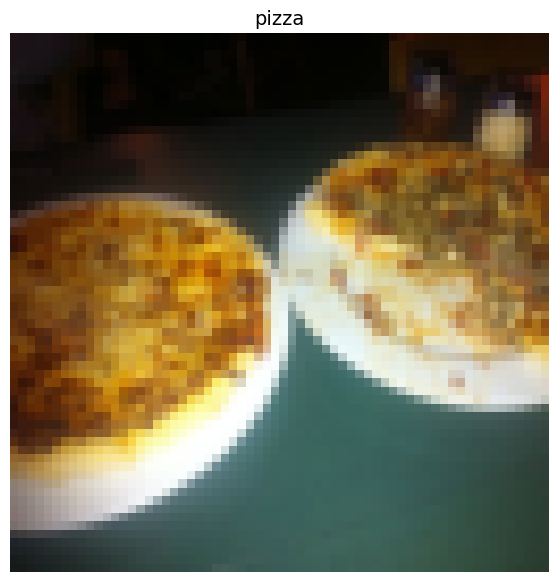

In [28]:
# rearrange the order dimension
img_permute = img.permute(1,2,0)

print(f"Original shape: {img.shape} ->color_channel,height,width")
print(f"Image permute: {img_permute.shape} ->height,width,colorchannel")

#plot image
plt.figure(figsize = (7,7))
plt.imshow(img_permute)
plt.axis(False)
plt.title(class_names[label],fontsize = 14)

In [29]:
# Turn loaded images into dataloader into iterables
# turn traiin and test datasets into dataloaders

from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle = True)
test_dataloader = DataLoader(dataset=test_data,
                            batch_size=BATCH_SIZE,
                            num_workers=os.cpu_count(),
                            shuffle=False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x18711e82490>,
 <torch.utils.data.dataloader.DataLoader at 0x18711e82430>)

In [30]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [31]:
len(list(train_dataloader))

225

Image shape: torch.Size([1, 3, 64, 64])-> batchsize,colorchannels,hieght,width
Label shape: torch.Size([1])
FIrst image: torch.Size([3, 64, 64])
Plotting the image:
AxesImage(80,52.8;496x369.6)


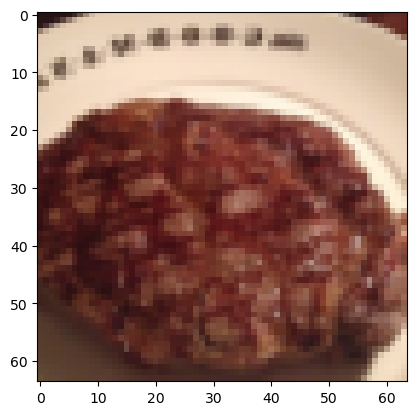

In [32]:
# batch size is 1 now, can be changed
img, label = next(iter(train_dataloader))
print(f"Image shape: {img.shape}-> batchsize,colorchannels,hieght,width")
print(f"Label shape: {label.shape}")

print(f"FIrst image: {img[0].shape}")
print(f"Plotting the image:\n{plt.imshow(img[0].squeeze().permute(1,2,0))}")

In [33]:
## Loading image data with a custom dataset
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [34]:
# instance of torchvision.datasets.Imagefolder
train_data.classes, test_data.classes

(['pizza', 'steak', 'sushi'], ['pizza', 'steak', 'sushi'])

In [35]:
# Setup path for target directory
target_directory = train_dir
print(f"Target dir: {target_directory}")

# get class names from directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: data\pizza_steak_sushi\train


['pizza', 'steak', 'sushi']

In [36]:
list(os.scandir(target_directory))

[<DirEntry 'pizza'>, <DirEntry 'steak'>, <DirEntry 'sushi'>]

In [37]:
def find_classes(directory: str) ->Tuple[List[str], Dict[str, int]]:
    """Find the class folder name in a target directory"""
    
    # GEt the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    
    # raise error if class names not found
    if not classes:
        raise FileNotFoundError(f"Could not find any classes in {directory}..")
    
    # create dictionary of index labels
    class_to_idx = {class_name:i for i,class_name in enumerate(classes)}
    
    return classes,class_to_idx

In [38]:
find_classes(directory=target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [39]:
# Create a custom dataset tp replace ImageDataset
# Write a custom dataset class
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):
    
    def __init__(self, targ_dir:str, 
                 transform=None):
        # get image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        
        # setup transforms
        self.transform = transform
        
        # create class and class_to_idx
        self.classes, self.class_to_idx = find_classes(targ_dir)
        
        
    def load_image(self, index: int) ->Image.Image:
        """Opens an image via a path and return it."""
        image_path = self.paths[index]
        return Image.open(image_path)
    
    
    def __len__(self) ->int:
        "Returns the total number of samples"
        return len(self.paths)
    
    def __getitem__(self, index:int) ->Tuple[torch.Tensor, int]:
        """Returns one sample of data, data and label (X,y)"""
        img = self.load_image(index)
        class_name = self.paths[index].parent.name #expects path : data_folder/class_name/image.jpg
        class_idx = self.class_to_idx[class_name]
        
        # transform 
        if self.transform:
            return self.transform(img), class_idx # return data, label (X,y)
        else:
            return img,class_to_idx

In [40]:
# create a transform
train_transform = transforms.Compose([
                                    transforms.Resize(size = (64,64)),
                                    transforms.RandomHorizontalFlip(p=0.5),
                                    transforms.ToTensor()
])

test_transform = transforms.Compose([
                            transforms.Resize(size=(64,64)),
                            transforms.ToTensor()
])

In [41]:
# Test our ImageFOlderCustom
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                     transform=train_transform)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                    transform=test_transform)

In [42]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x187120184c0>,
 <__main__.ImageFolderCustom at 0x18712018310>)

In [43]:
train_data

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data\pizza_steak_sushi\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [44]:
len(train_data), len(train_data_custom)

(225, 225)

In [45]:
len(test_data), len(test_data_custom)

(75, 75)

In [46]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [47]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [48]:
print(train_data_custom.classes == train_data.classes)
print(test_data_custom.classes == test_data.classes)

True
True


In [49]:
# Create a function to display images
def display_random_images(dataset:torch.utils.data.Dataset,
                         classes: List[str] = None,
                         n: int=10,
                         display_shape: bool =True,
                         seed: int =None):
    
    # Adjust display if nis too high
    if n >10:
        n=10
        display_shape = False
        print(f"For display, purporses, n should not be larger than 10, setting to 10 and removing shape display")
        
    # set the seed 
    if seed:
        random.seed(seed)
        
    # get random indexes
    random_samples_idx = random.sample(range(len(dataset)),k=n)
    print(random_samples_idx)
    
    plt.figure(figsize= (16,8))
    
    # loop throguh random indexes and plot them with matplotlib
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]
    
    # adjust tensor dimensions
        targ_image_adjust = targ_image.permute(1,2,0)
    
        plt.subplot(1, n,i+1)
        plt.imshow(targ_image_adjust)
        plt.axis(False)
    
        if classes:
            title = f"class : {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
            
        plt.title(title)        

[23, 81, 145, 73, 121]


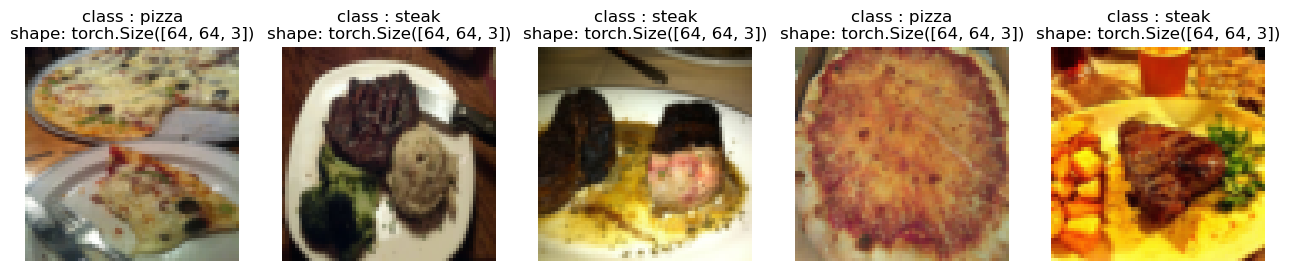

In [50]:
# display random images from the ImageFolder created datset
display_random_images(train_data,
                     n=5,
                     classes = class_names,
                     seed=None)

For display, purporses, n should not be larger than 10, setting to 10 and removing shape display
[69, 193, 18, 36, 121, 177, 17, 94, 32, 114]


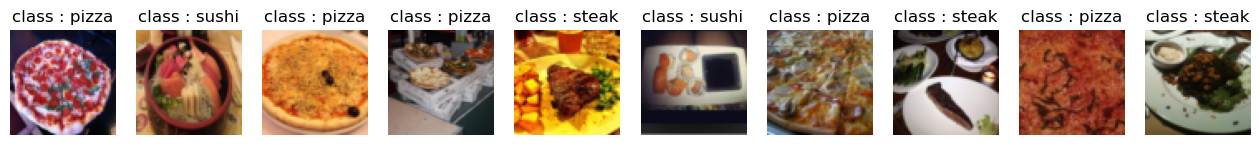

In [51]:
# display random image from ImageFolderCustom class dataset
display_random_images(train_data_custom,
                     n=20,
                     classes = class_names,
                     seed = None)

[192, 24, 108, 15, 158]


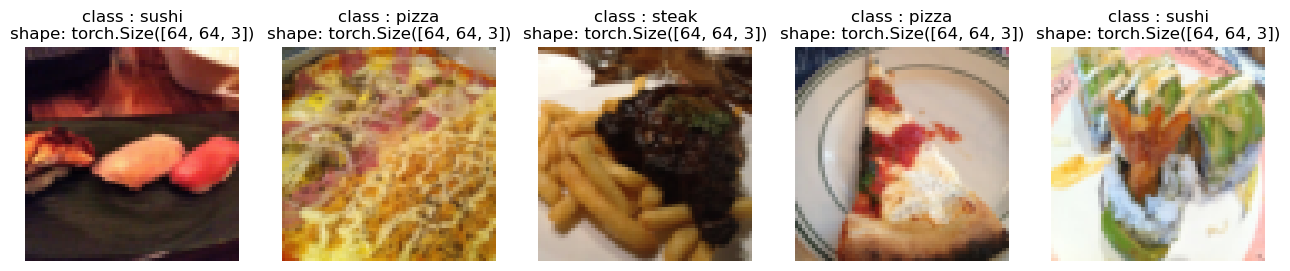

In [52]:
# display random image from ImageFolderCustom class dataset
display_random_images(train_data_custom,
                     n=5,
                     classes = class_names,
                     seed = None)

In [53]:
random.sample(range(len(train_data_custom)),4)

[52, 212, 134, 83]

In [54]:
# turn custom loaded images into dataloader
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=0,
                                    shuffle = True)
test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                   batch_size=BATCH_SIZE,
                                   num_workers=os.cpu_count(),
                                   shuffle=False)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x18711d05d00>,
 <torch.utils.data.dataloader.DataLoader at 0x1870cbfaac0>)

In [55]:
# Get image and label from custom dataloader
img_custom ,label_custom = next(iter(train_dataloader_custom))

img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [56]:
# data augmentation
from torchvision import transforms

train_transform = transforms.Compose([
                transforms.Resize(size=(224,224)),
                transforms.TrivialAugmentWide(num_magnitude_bins=31),
                transforms.ToTensor()
])

test_transform = transforms.Compose([
                transforms.Resize(size=(224,224)),
                transforms.ToTensor()
])

# get all image path
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:9]

[WindowsPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/194643.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/195160.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2003290.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2019408.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2111981.jpg')]

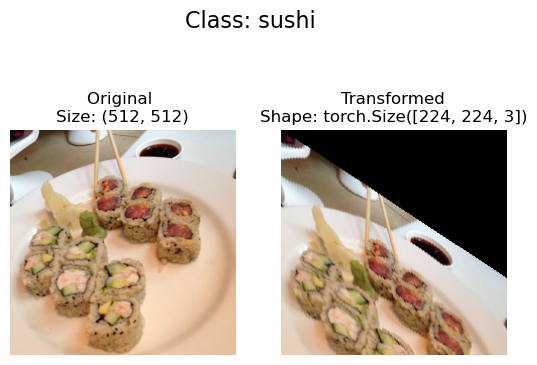

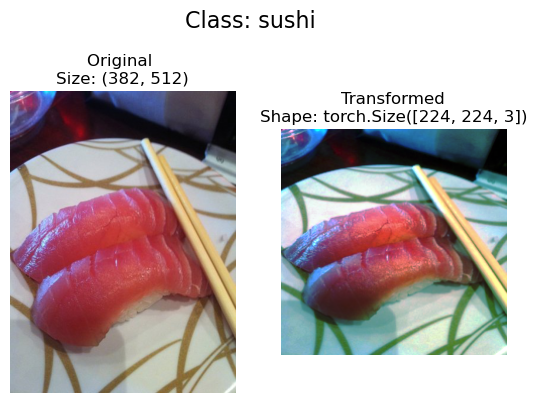

In [57]:
# plot  random images
plot_transformed_images(image_paths=image_path_list,
                       transform=train_transform,
                       n=2,seed=None)

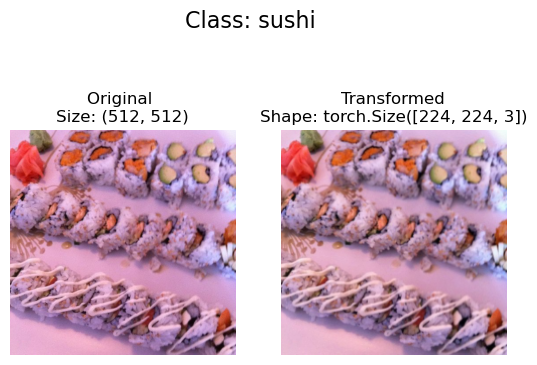

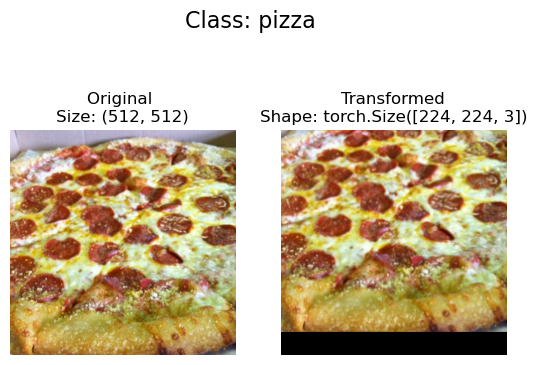

In [58]:
# plot  random images
plot_transformed_images(image_paths=image_path_list,
                       transform=train_transform,
                       n=2,seed=None)

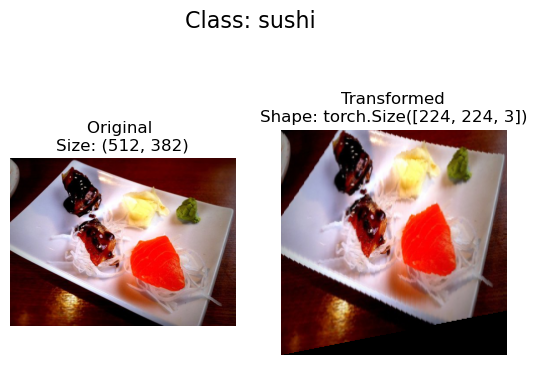

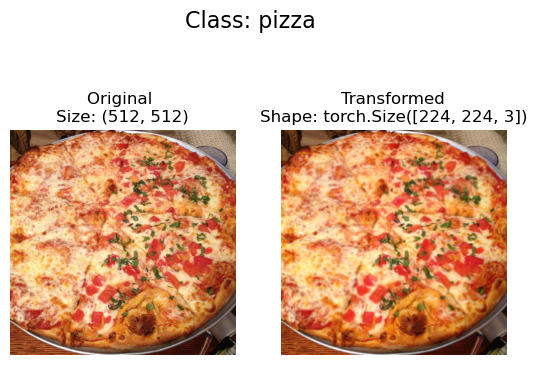

In [59]:
# plot  random images
plot_transformed_images(image_paths=image_path_list,
                       transform=train_transform,
                       n=2,seed=None)

In [60]:
# MOdel 0 tiny vgg without data augmentation
# create transforms and load data for model 0

simple_transform = transforms.Compose([
        transforms.Resize(size=(64,64)),
        transforms.ToTensor()
])

In [61]:
# load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir,
                                        transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                       transform=simple_transform)

# turn datasets into dataloaders
import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=True,
                                    num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                   batch_size=BATCH_SIZE,
                                   shuffle=False,num_workers=NUM_WORKERS)

In [62]:
# create a tinyvgg
class TinyVGG(nn.Module):
    
    def __init__(self, input_shape:int,
                hidden_units: int,
                output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
                nn.Conv2d(in_channels=input_shape,
                         out_channels=hidden_units,
                         kernel_size=3,
                         stride=1,
                         padding=0),
                nn.ReLU(),
                nn.Conv2d(in_channels=hidden_units,
                         out_channels=hidden_units,
                         kernel_size=3,
                         stride=1,
                         padding=0),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2,
                            stride=2) # default stride value is same as kernel sie
            )
        self.conv_block_2 = nn.Sequential(
                nn.Conv2d(in_channels=hidden_units,
                         out_channels=hidden_units,
                         kernel_size=3,
                         stride=1,
                         padding=0),
                nn.ReLU(),
                nn.Conv2d(in_channels=hidden_units,
                         out_channels=hidden_units,
                         kernel_size=3,
                         stride=1,
                         padding=0),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2,
                            stride=2) # default stride value is same as kernel sie
            )
        
        self.classifier = nn.Sequential(
                nn.Flatten(),
                nn.Linear(in_features=hidden_units*13*13,
                         out_features=output_shape)
        )
        
    def forward(self, x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        return x

In [63]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                 hidden_units=10,
                 output_shape=len(class_names)).to(device) # color chaneel
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [64]:
# model_0.state_dict()

In [65]:
# try a forward pass on a single image
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [66]:
model_0(image_batch)

tensor([[ 2.0789e-02, -1.9351e-03,  9.5317e-03],
        [ 1.8427e-02,  2.4670e-03,  6.6757e-03],
        [ 1.7699e-02,  1.0262e-03,  9.4657e-03],
        [ 2.4441e-02, -3.3526e-03,  9.6011e-03],
        [ 1.9930e-02,  6.6317e-04,  1.0779e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0999e-02,  1.2869e-04,  1.2473e-02],
        [ 2.1577e-02, -1.9507e-03,  9.6941e-03],
        [ 2.4504e-02, -4.7745e-03,  8.5280e-03],
        [ 2.0252e-02, -4.7294e-04,  1.0908e-02],
        [ 2.2215e-02, -4.1838e-04,  9.8123e-03],
        [ 2.2313e-02, -2.1622e-03,  9.4455e-03],
        [ 2.1841e-02, -3.7132e-03,  8.3783e-03],
        [ 2.2863e-02, -1.7724e-03,  1.0287e-02],
        [ 2.1647e-02, -4.4139e-03,  9.5022e-03],
        [ 2.2096e-02, -4.1426e-03,  9.3853e-03],
        [ 2.1209e-02, -4.4219e-03,  1.1475e-02],
        [ 2.1711e-02, -2.7656e-03,  8.5006e-03],
        [ 1.9951e-02,  2.8256e-05,  8.4380e-03],
        [ 1.8298e-02,  1.6306e-03,  8.5499e-03],
        [ 2.0768e-02

In [67]:
# !pip install torchinfo

In [68]:
from torchinfo import summary
summary(model_0,input_size = [1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [69]:
## create train and test loop function
def train_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer:torch.optim.Optimizer,device=device
              ):
    
    model.train()
    
    train_loss, train_acc = 0, 0
    
    for batch, (X,y) in enumerate(dataloader):
        X,y = X.to(device) , y.to(device)
        
        y_pred = model(X) #output model logits
        
        loss = loss_fn(y_pred,y)
        train_loss += loss.item()
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim =1),dim=1)
        train_acc += (y_pred_class == y).sum().item() / len(y_pred)
    
    #adjust metrics   to get average loss ,acc per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    
    return train_loss, train_acc

In [70]:
# create test function
def test_step(model:torch.nn.Module,
             dataloader: torch.utils.data.DataLoader,
             loss_fn: torch.nn.Module,
             device=device):
    
    model.eval()
    
    test_loss, test_acc = 0, 0
    
    with torch.inference_mode():
        for batch, (X,y) in enumerate(dataloader):
            
            X,y = X.to(device), y.to(device)
            
            test_pred_logits = model(X)
            
            loss = loss_fn(test_pred_logits,y)
            test_loss +=loss.item()
            
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc +=((test_pred_labels == y).sum().item() / len(test_pred_labels))
            
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [71]:
# create train() function to combine train_step and test_step
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
         train_dataloader: torch.utils.data.DataLoader,
         test_dataloader: torch.utils.data.DataLoader,
         optimizer: torch.optim.Optimizer,
         loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
         epochs: int =5,
         device = device):
    
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}
    
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device = device)
        
        test_loss, test_acc = test_step(model=model,
                                       dataloader=test_dataloader,
                                       loss_fn=loss_fn,
                                       device=device)
        
        
        print(f"Epoch: {epoch} |train loss :{train_loss:.4f} train acc:{train_acc:.2f}% | test loss: {test_loss:.4f} test acc:{test_acc:.2f}%")
        
        
        results['train_loss'].append(train_loss)
        results['train_acc'].append(train_acc)
        results['test_loss'].append(test_loss)
        results['test_acc'].append(test_acc)
        
    # return the filled reults at the end of epochs
    return results
    

In [72]:
# train and evaluate model 0
torch.manual_seed(42)


NUM_EPOCHS = 10

model_0 = TinyVGG(input_shape=3,
                     hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),lr=0.001)

from timeit import default_timer as timer
start_time = timer()

# train model 0
model_0_results = train(model=model_0,train_dataloader=train_dataloader_simple,test_dataloader=test_dataloader_simple,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=NUM_EPOCHS)

end_time = timer()

print(f"Total training time: {end_time - start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 |train loss :1.1063 train acc:0.30% | test loss: 1.0983 test acc:0.31%
Epoch: 1 |train loss :1.0995 train acc:0.33% | test loss: 1.0698 test acc:0.54%
Epoch: 2 |train loss :1.0863 train acc:0.49% | test loss: 1.0800 test acc:0.52%
Epoch: 3 |train loss :1.0826 train acc:0.41% | test loss: 1.0599 test acc:0.57%
Epoch: 4 |train loss :1.0632 train acc:0.41% | test loss: 1.0614 test acc:0.55%
Epoch: 5 |train loss :1.0220 train acc:0.46% | test loss: 1.0072 test acc:0.48%
Epoch: 6 |train loss :0.9681 train acc:0.43% | test loss: 0.9275 test acc:0.60%
Epoch: 7 |train loss :0.9414 train acc:0.59% | test loss: 1.0158 test acc:0.47%
Epoch: 8 |train loss :0.9188 train acc:0.60% | test loss: 1.0668 test acc:0.34%
Epoch: 9 |train loss :0.9954 train acc:0.46% | test loss: 1.0443 test acc:0.39%
Total training time: 168.920 seconds


In [73]:
model_0_results

{'train_loss': [1.1063424497842789,
  1.0994888097047806,
  1.086281642317772,
  1.0825861990451813,
  1.0631501227617264,
  1.0219791233539581,
  0.9680948182940483,
  0.9414247497916222,
  0.918780006468296,
  0.9953979551792145],
 'train_acc': [0.3046875,
  0.33203125,
  0.4921875,
  0.41015625,
  0.4140625,
  0.45703125,
  0.4296875,
  0.5859375,
  0.59765625,
  0.46484375],
 'test_loss': [1.09831436475118,
  1.069840908050537,
  1.0800273021062214,
  1.0598681767781575,
  1.0613970359166462,
  1.007152795791626,
  0.9274693330128988,
  1.0158466498057048,
  1.0668208599090576,
  1.0443256696065266],
 'test_acc': [0.31155303030303033,
  0.5416666666666666,
  0.5227272727272728,
  0.5729166666666666,
  0.5539772727272728,
  0.48200757575757575,
  0.6041666666666666,
  0.4744318181818182,
  0.3428030303030303,
  0.393939393939394]}

In [74]:
# plot loss curves
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [75]:
def plot_loss_curves(results: Dict[str,List[float]]):
    """Plot training curves of a result dictionary"""
    
    loss = results['train_loss']
    test_loss = results['test_loss']
    
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']
    
    epochs = range(len(results['train_loss']))
    
    plt.figure(figsize = (15,7))
    
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label = 'train loss')
    plt.plot(epochs, test_loss, label = "test loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()
    
    
    plt.subplot(1,2,2)
    plt.plot(epochs, accuracy, label = "traiin accuacy")
    plt.plot(epochs, test_accuracy, label = 'test accuracy')
    plt.title("Accuracy")
    plt.xlabel("EPochs")
    plt.legend()

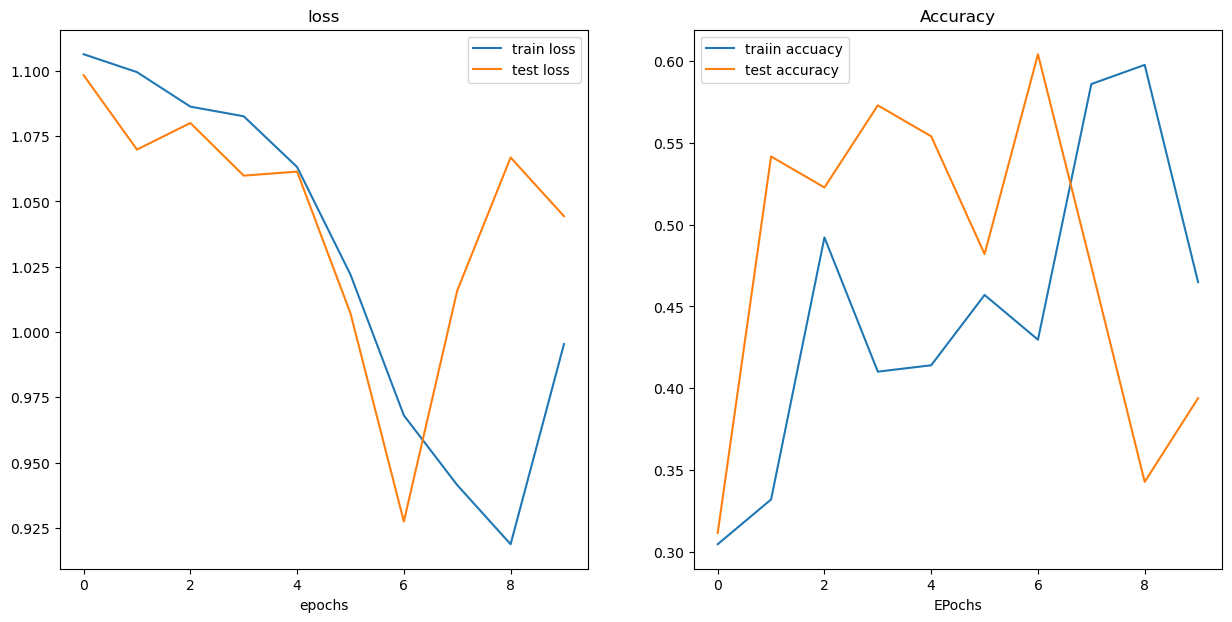

In [76]:
plot_loss_curves(model_0_results)

In [77]:
# Model 1 tiny vgg with data augmentation
from torchvision import transforms
train_transform_trivial = transforms.Compose([
        transforms.Resize(size=(64,64)),
        transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform_simple = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.ToTensor()
])

In [78]:
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root=train_dir,
                                           transform=train_transform_trivial)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                       transform=test_transform_simple)

In [79]:
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                       batch_size=BATCH_SIZE,
                                       shuffle=True,num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                   batch_size=BATCH_SIZE,
                                   shuffle=False,
                                   num_workers=NUM_WORKERS)

In [80]:
# this time we augmented the training data
# create model_1
torch.manual_seed(42)

model_1 = TinyVGG(input_shape=3,
                 hidden_units=10,
                 output_shape=len(train_data_augmented.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [81]:
torch.manual_seed(42)

NUM_EPOCHS = 10

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=model_1.parameters(),
                            lr = 0.001)

from timeit import default_timer as timer
start_time = timer()

model_1_results = train(model=model_1,
                       train_dataloader=train_dataloader_augmented,
                       test_dataloader=test_dataloader_simple,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=NUM_EPOCHS,
                       device=device)

end_time = timer()
print(f"Total training time for model_1: {end_time - start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 |train loss :1.1046 train acc:0.25% | test loss: 1.1016 test acc:0.26%
Epoch: 1 |train loss :1.0764 train acc:0.43% | test loss: 1.1301 test acc:0.26%
Epoch: 2 |train loss :1.0733 train acc:0.43% | test loss: 1.1678 test acc:0.26%
Epoch: 3 |train loss :1.1219 train acc:0.30% | test loss: 1.1551 test acc:0.26%
Epoch: 4 |train loss :1.0775 train acc:0.46% | test loss: 1.1521 test acc:0.27%
Epoch: 5 |train loss :1.0947 train acc:0.39% | test loss: 1.1384 test acc:0.30%
Epoch: 6 |train loss :1.0373 train acc:0.55% | test loss: 1.1194 test acc:0.30%
Epoch: 7 |train loss :1.0583 train acc:0.50% | test loss: 1.0951 test acc:0.28%
Epoch: 8 |train loss :1.0407 train acc:0.48% | test loss: 1.0768 test acc:0.37%
Epoch: 9 |train loss :0.9641 train acc:0.58% | test loss: 0.9880 test acc:0.44%
Total training time for model_1: 168.589 seconds


In [82]:
model_1_results

{'train_loss': [1.1045757830142975,
  1.076408714056015,
  1.0732744336128235,
  1.121912568807602,
  1.077516347169876,
  1.0947276502847672,
  1.0373439267277718,
  1.0582860261201859,
  1.0406643599271774,
  0.9641037583351135],
 'train_acc': [0.25,
  0.42578125,
  0.42578125,
  0.3046875,
  0.4609375,
  0.39453125,
  0.546875,
  0.49609375,
  0.48046875,
  0.578125],
 'test_loss': [1.1015849908192952,
  1.130143900712331,
  1.1678479115168254,
  1.155096213022868,
  1.152141849199931,
  1.1384361187616985,
  1.119443456331889,
  1.0950576861699421,
  1.0768356521924336,
  0.9879640142122904],
 'test_acc': [0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2708333333333333,
  0.3020833333333333,
  0.3020833333333333,
  0.28125,
  0.3731060606060606,
  0.44223484848484845]}

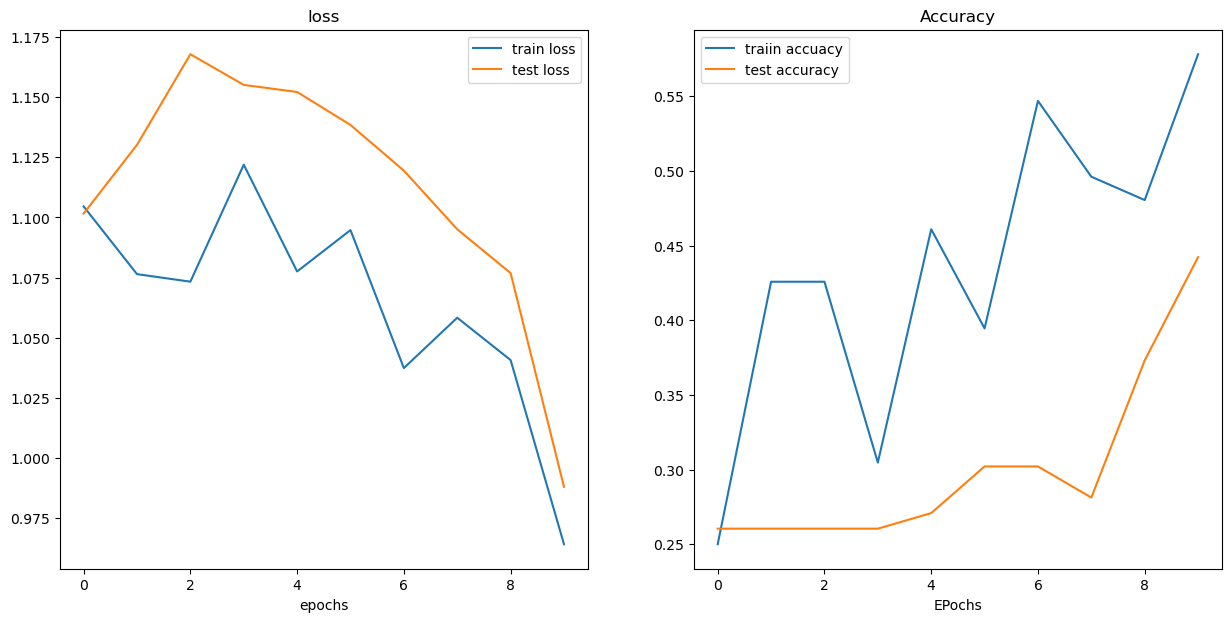

In [83]:
plot_loss_curves(model_1_results)

In [84]:
# compare model results
import pandas as pd
model_1_df = pd.DataFrame(model_1_results)
model_0_df = pd.DataFrame(model_0_results)
model_0_df


train_loss  train_acc  test_loss  test_acc
0    1.106342   0.304688   1.098314  0.311553
1    1.099489   0.332031   1.069841  0.541667
2    1.086282   0.492188   1.080027  0.522727
3    1.082586   0.410156   1.059868  0.572917
4    1.063150   0.414062   1.061397  0.553977
5    1.021979   0.457031   1.007153  0.482008
6    0.968095   0.429688   0.927469  0.604167
7    0.941425   0.585938   1.015847  0.474432
8    0.918780   0.597656   1.066821  0.342803
9    0.995398   0.464844   1.044326  0.393939

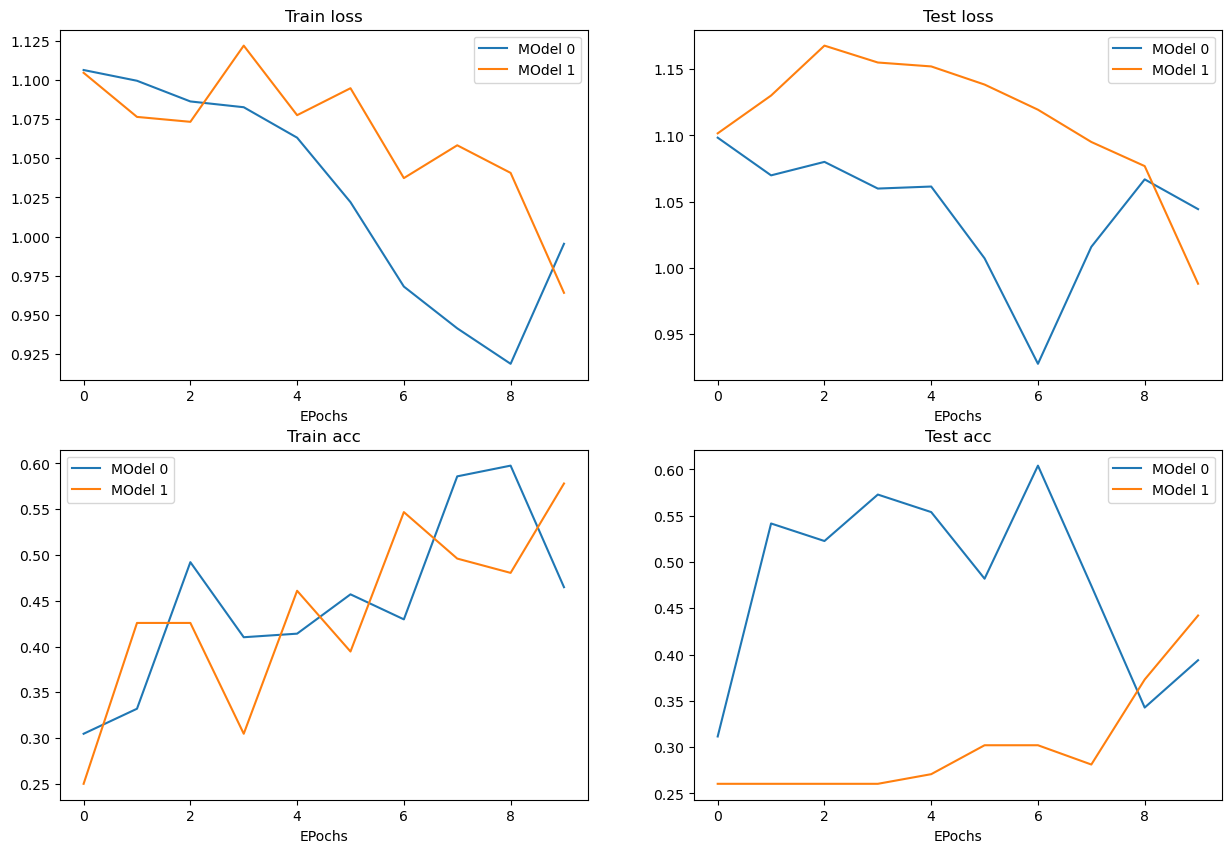

In [85]:
plt.figure(figsize=(15,10))

epochs = range(len(model_0_df))

plt.subplot(2,2,1)
plt.plot(epochs, model_0_df['train_loss'], label = 'MOdel 0')
plt.plot(epochs, model_1_df['train_loss'], label = 'MOdel 1')
plt.xlabel("EPochs")
plt.title("Train loss")
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, model_0_df['test_loss'], label = 'MOdel 0')
plt.plot(epochs, model_1_df['test_loss'], label = 'MOdel 1')
plt.xlabel("EPochs")
plt.title("Test loss")
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, model_0_df['train_acc'], label = 'MOdel 0')
plt.plot(epochs, model_1_df['train_acc'], label = 'MOdel 1')
plt.xlabel("EPochs")
plt.title("Train acc")
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs, model_0_df['test_acc'], label = 'MOdel 0')
plt.plot(epochs, model_1_df['test_acc'], label = 'MOdel 1')
plt.xlabel("EPochs")
plt.title("Test acc")
plt.legend()

In [86]:
data_path

WindowsPath('data')

In [87]:
#Making predictions ona acustome image
import requests

custom_image_path = data_path / '04-pizza-dad.jpeg'

if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg')
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists")

data\04-pizza-dad.jpeg already exists


In [88]:
import torchvision

custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
print(f"Custom image tensor:\n {custom_image_uint8}")
print(f"Custom image shape: {custom_image_uint8.shape}")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

Custom image tensor:
 tensor([[[154, 175, 181,  ...,  21,  18,  14],
         [146, 167, 180,  ...,  21,  18,  15],
         [124, 146, 171,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 189, 193,  ...,  22,  19,  15],
         [163, 181, 194,  ...,  22,  19,  16],
         [141, 163, 185,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 106, 104, 102],
         [ 47,  38,  24,  ..., 108, 105, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[117, 138, 145,  ...,  17,  14,  10],
         [109, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  54,  52,  50],
         [ 27,  18,   4,  ...,  50,  47,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)
Custom image shape: torch.Size([3, 4032, 3024])
Custom image dtyp

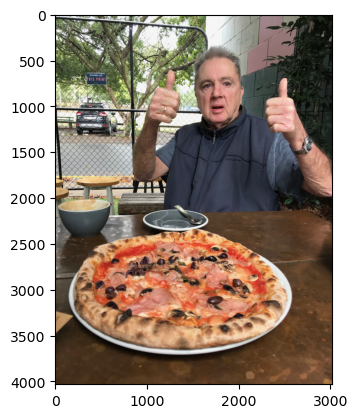

In [89]:
plt.imshow(custom_image_uint8.permute(1,2,0))

In [90]:
# making a prediction ona acustom image with a trained model
# model_1.eval()
# with torch.inference_mode():
#     model_1(custom_image_uint8.to(device))

In [91]:
# load image and convert to torch.float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32) / 255
custom_image

tensor([[[0.6039, 0.6863, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6549, 0.7059,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6706,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7412, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7098, 0.7608,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7255,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4157, 0.4078, 0.4000],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4118, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4588, 0.5412, 0.5686,  ..., 0.0667, 0.0549, 0.0392],
         [0.4275, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

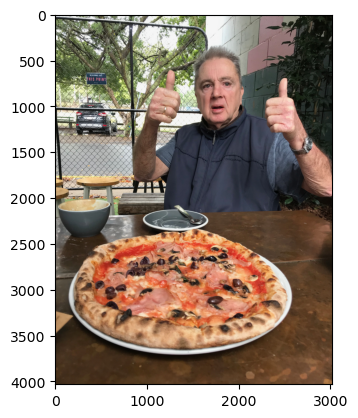

In [92]:
plt.imshow(custom_image.permute(1,2,0))

In [93]:
# create transform pipeline to resize image
custom_image_transform = transforms.Compose([
        transforms.Resize(size = (64,64))
])
# transform target image
custom_image_transformed = custom_image_transform(custom_image)

print(f"Original shape: {custom_image.shape}")
print(f"Transformed shape : {custom_image_transformed.shape}")

Original shape: torch.Size([3, 4032, 3024])
Transformed shape : torch.Size([3, 64, 64])


C:\Users\harpr\anaconda3\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


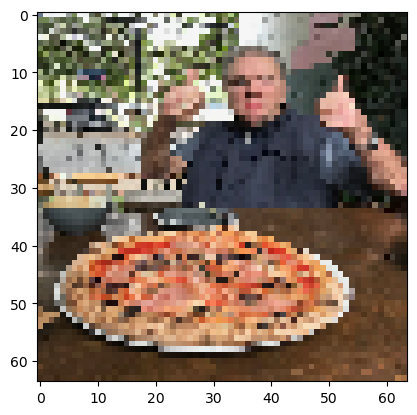

In [94]:
plt.imshow(custom_image_transformed.permute(1,2,0))

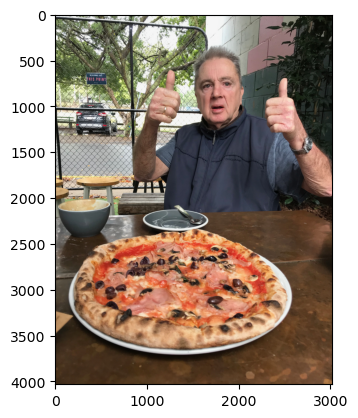

In [95]:
plt.imshow(custom_image.permute(1,2,0))

In [96]:
custom_image_transformed.shape # no batch size provided  in prediction model Error will be shown

torch.Size([3, 64, 64])

In [97]:
custom_image_transformed.shape , custom_image_transformed.unsqueeze(0).shape # no batch size provided  in prediction model

(torch.Size([3, 64, 64]), torch.Size([1, 3, 64, 64]))

In [98]:
# This will error because no batch size
model_1.eval()
with torch.inference_mode():
    custom_image_pred = model_1(custom_image_transformed.unsqueeze(0))
custom_image_pred # prediction logits

tensor([[-0.2397, -0.1134, -0.0256]])

In [99]:
class_names

['pizza', 'steak', 'sushi']

In [100]:
# convert logits -> prediction probabilities
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
custom_image_pred_probs

tensor([[0.2965, 0.3363, 0.3672]])

In [101]:
# convert prediction probabilites --> prediction labels
custom_image_pred_labels = torch.argmax(custom_image_pred_probs, dim=1)
custom_image_pred_labels

tensor([2])

In [102]:
class_names[custom_image_pred_labels]

'sushi'

In [103]:
## putting custom image prediction together
def pred_and_plot_image(model: torch.nn.Module,
                       image_path: str,
                       class_names: List[str] = None,
                       transform=None,
                       device=device):
    """Make a prediction on a target image with a trained model andplot it"""
    
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
    
    # divie=de the image pixel values by 255 to get them between [0,1]
    target_image = target_image / 255
    
    if transform:
        target_image = transform(target_image)
        
    model.to(device)
    
    # turn on eval/ inference mode and make prediction
    model.eval()
    with torch.inference_mode():
        target_image = target_image.unsqueeze(0) # add extra dimension (for batch) model predicts on batches
        
        target_image_pred = model(target_image.to(device))
        
    # covert logiuts --> probs
    target_image_pred_probs = torch.softmax(target_image_pred,dim=1)
    
    # convert probs into labels
    target_image_pred_label = torch.argmax(target_image_pred_probs,dim=1)
    
    # plot the image
    plt.imshow(target_image.squeeze().permute(1,2,0)) # remove batch dimension and rearrang shape for matplotlib
    
    
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | prob: {target_image_pred_probs.max().cpu():.3f}"
    
    plt.title(title)
    plt.axis(False)

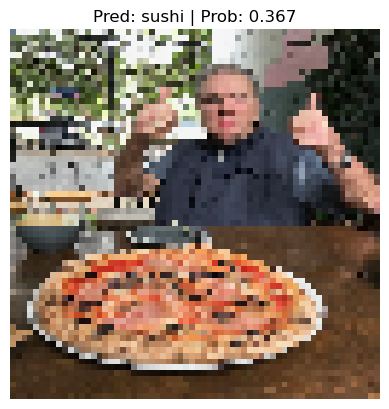

In [104]:
# pred on our custom image
pred_and_plot_image(model = model_1,
                   image_path=custom_image_path,
                   class_names=class_names,
                   transform=custom_image_transform,device=device)